# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | beledweyne
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | bubaque
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | malmberget
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | tadjourah
Processing Record 12 of Set 1 | ndende
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | mejit
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | flying fish cove
Processing Record 22 of Set 1 | georgetown
Processing Reco

Processing Record 43 of Set 4 | acarau
Processing Record 44 of Set 4 | villa gesell
Processing Record 45 of Set 4 | haiku-pauwela
Processing Record 46 of Set 4 | el granada
Processing Record 47 of Set 4 | usoke
Processing Record 48 of Set 4 | la punta
Processing Record 49 of Set 4 | santo tome
Processing Record 0 of Set 5 | vila franca do campo
Processing Record 1 of Set 5 | tazovsky
Processing Record 2 of Set 5 | gijang
Processing Record 3 of Set 5 | ta`u
Processing Record 4 of Set 5 | ouellah
City not found. Skipping...
Processing Record 5 of Set 5 | siocon
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | ulladulla
Processing Record 8 of Set 5 | slave lake
Processing Record 9 of Set 5 | aktau
Processing Record 10 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 5 | san rafael
Processing Record 12 of Set 5 | guerrero negro
Processing Record 13 of Set 5 | mutuali
Processing Record 14 of Set 5 | kapchorwa
Processing Record 15 of Set 

Processing Record 37 of Set 8 | farafangana
Processing Record 38 of Set 8 | kalengwa
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | uniontown
Processing Record 41 of Set 8 | vallenar
Processing Record 42 of Set 8 | aga
Processing Record 43 of Set 8 | sweet home
Processing Record 44 of Set 8 | bikenibeu village
Processing Record 45 of Set 8 | stanthorpe
Processing Record 46 of Set 8 | minas de marcona
Processing Record 47 of Set 8 | howard springs
Processing Record 48 of Set 8 | toropets
Processing Record 49 of Set 8 | chibougamau
Processing Record 0 of Set 9 | mount pearl
Processing Record 1 of Set 9 | serenje
Processing Record 2 of Set 9 | severo-yeniseyskiy
Processing Record 3 of Set 9 | atafu village
Processing Record 4 of Set 9 | fruita
Processing Record 5 of Set 9 | plettenberg bay
Processing Record 6 of Set 9 | malax
Processing Record 7 of Set 9 | belaya kholunitsa
Processing Record 8 of Set 9 | tvoroyri
Processing Record 9 of Set 9 | vorkuta
Processing 

Processing Record 25 of Set 12 | rio gallegos
Processing Record 26 of Set 12 | berdigestyakh
Processing Record 27 of Set 12 | fort mcmurray
Processing Record 28 of Set 12 | aripuana
Processing Record 29 of Set 12 | khandyga
Processing Record 30 of Set 12 | taro
Processing Record 31 of Set 12 | moroni
Processing Record 32 of Set 12 | al marj
Processing Record 33 of Set 12 | bakanas
Processing Record 34 of Set 12 | sao joao da barra
Processing Record 35 of Set 12 | shimoda
Processing Record 36 of Set 12 | portland
Processing Record 37 of Set 12 | rulenge
Processing Record 38 of Set 12 | camapua
Processing Record 39 of Set 12 | soledade
Processing Record 40 of Set 12 | afaahiti
Processing Record 41 of Set 12 | coari
Processing Record 42 of Set 12 | kyosai
Processing Record 43 of Set 12 | manta
Processing Record 44 of Set 12 | znamenskoye
Processing Record 45 of Set 12 | gangtok
Processing Record 46 of Set 12 | big bend
-----------------------------
Data Retrieval Complete      
----------

In [4]:
# Print the structure of a sample dictionary from city_data
print("Sample Dictionary Structure:")
print(city_data[0])  # Assuming 0 is an index that exists in your list

Sample Dictionary Structure:
{'City': 'port mathurin', 'Lat': -19.6833, 'Lng': 63.4167, 'Max Temp': 23, 'Humidity': 63, 'Cloudiness': 0, 'Wind Speed': 8.62, 'Country': 'MU', 'Date': 1691608101}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Extract specific columns
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,23.00,63,0,8.62,MU,1691608101
1,port-aux-francais,-49.3500,70.2167,2.48,78,87,12.06,TF,1691608021
2,beledweyne,4.7358,45.2036,26.00,60,79,9.93,SO,1691608619
3,nemuro,43.3236,145.5750,18.78,100,100,6.06,JP,1691607923
4,bubaque,11.2833,-15.8333,27.56,79,44,3.58,GW,1691608104


In [7]:
# Define the output data file path
output_data_file = "output_data/cities.csv"

# Extract the directory from the file path
output_directory = os.path.dirname(output_data_file)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,23.00,63,0,8.62,MU,1691608101
1,port-aux-francais,-49.3500,70.2167,2.48,78,87,12.06,TF,1691608021
2,beledweyne,4.7358,45.2036,26.00,60,79,9.93,SO,1691608619
3,nemuro,43.3236,145.5750,18.78,100,100,6.06,JP,1691607923
4,bubaque,11.2833,-15.8333,27.56,79,44,3.58,GW,1691608104


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

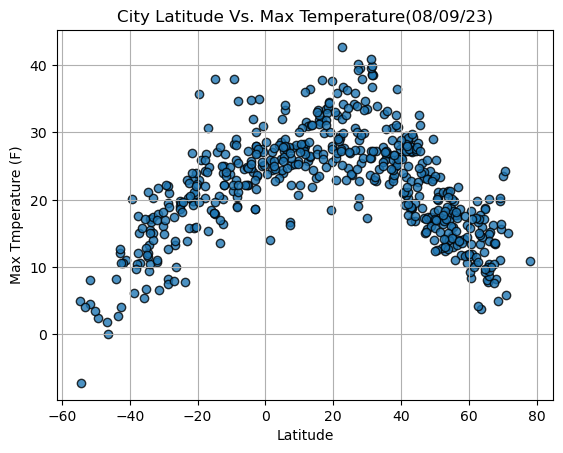

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Tmperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
                                    
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

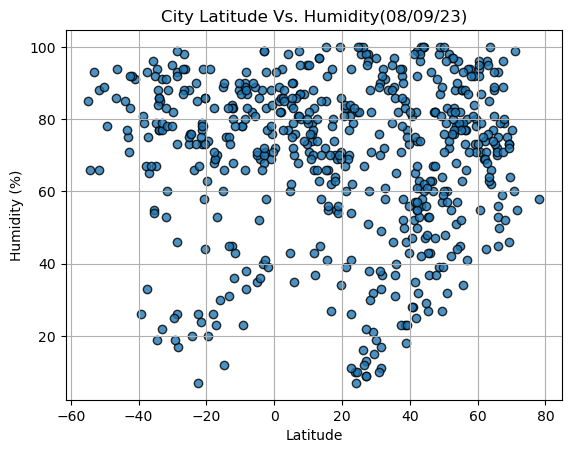

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidth=1,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

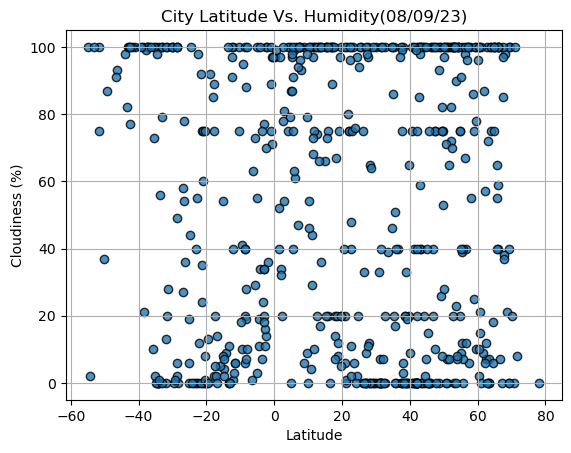

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

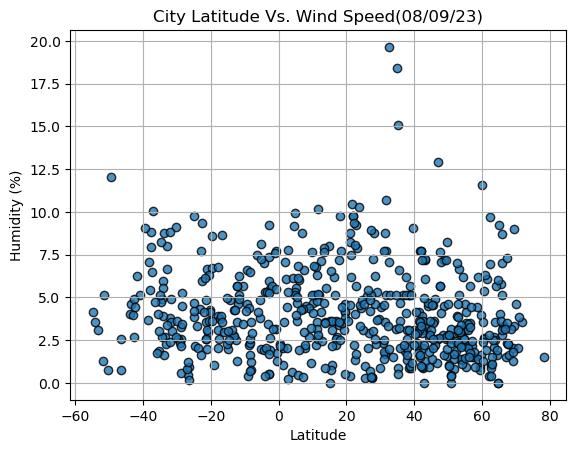

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  
    
    # Fixed y_values
    line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()     

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,beledweyne,4.7358,45.2036,26.00,60,79,9.93,SO,1691608619
3,nemuro,43.3236,145.5750,18.78,100,100,6.06,JP,1691607923
4,bubaque,11.2833,-15.8333,27.56,79,44,3.58,GW,1691608104
5,bethel,41.3712,-73.4140,29.45,52,40,4.12,US,1691608552
6,malmberget,67.1753,20.6549,16.31,59,0,1.54,SE,1691608619


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,23.00,63,0,8.62,MU,1691608101
1,port-aux-francais,-49.3500,70.2167,2.48,78,87,12.06,TF,1691608021
7,grytviken,-54.2811,-36.5092,-7.19,66,2,3.58,GS,1691608090
8,hermanus,-34.4187,19.2345,13.25,88,0,4.93,ZA,1691608579
11,ndende,-2.4008,11.3581,26.90,58,100,2.64,GA,1691608620


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6854762408756947


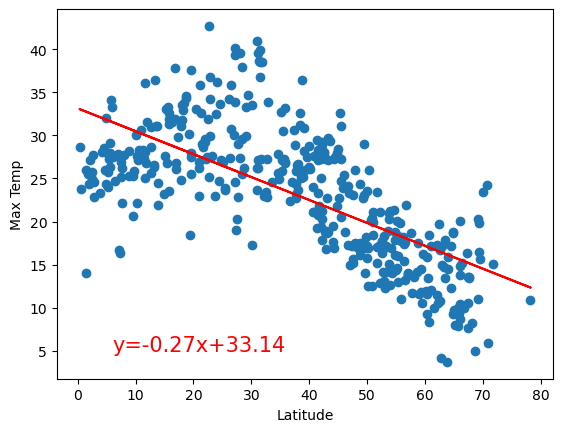

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,5))

The r-squared is: 0.8015772665870852


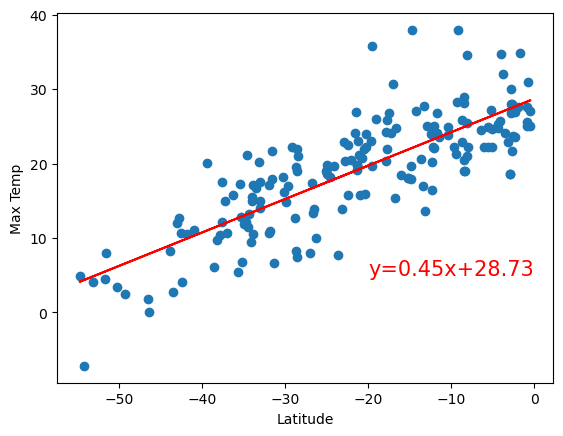

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-20,5))

**Discussion about the linear relationship:** Northern hemisphere has a negative correlation.  Southern hemisphere has a positive correlation.  The temperature decreases moving away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 3.061481888733363e-05


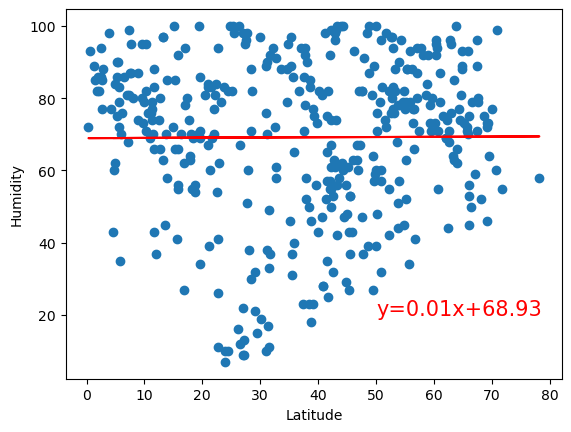

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (50,20))


The r-squared is: 0.010149990841746373


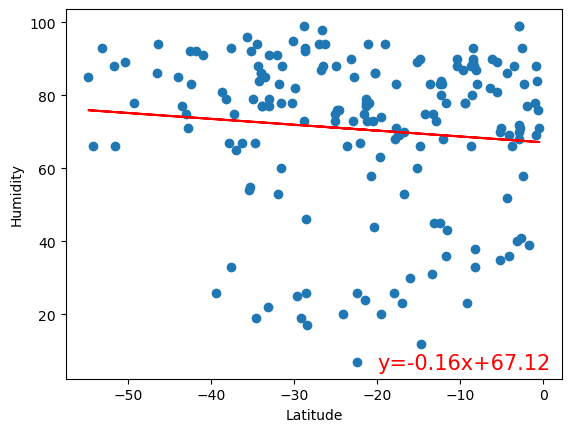

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-20,5))

**Discussion about the linear relationship:** The northern hemisphere has a week positive correlation and the southern hemisphere has a week negative correlation.  The humidity increases slightly moving away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008319291127389385


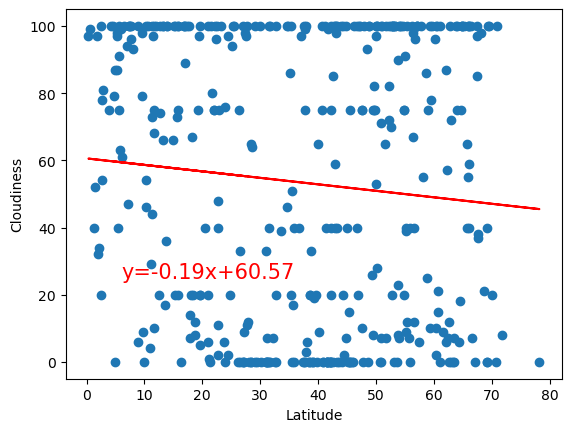

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,25))

The r-squared is: 0.04499158153284247


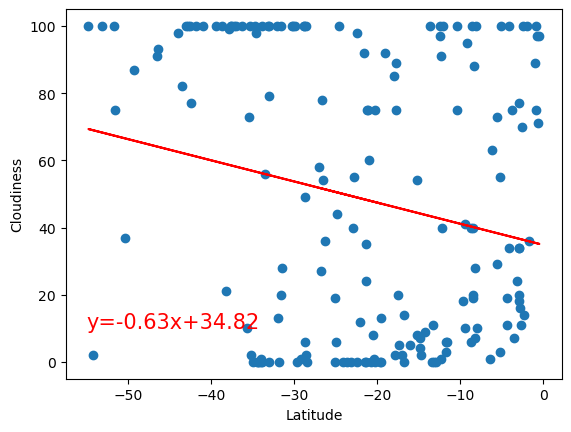

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,10))

**Discussion about the linear relationship:** Both the northern and southern hemispheres have week negative correlations.  The cloudiness increases slightly moving closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.035568773801765145


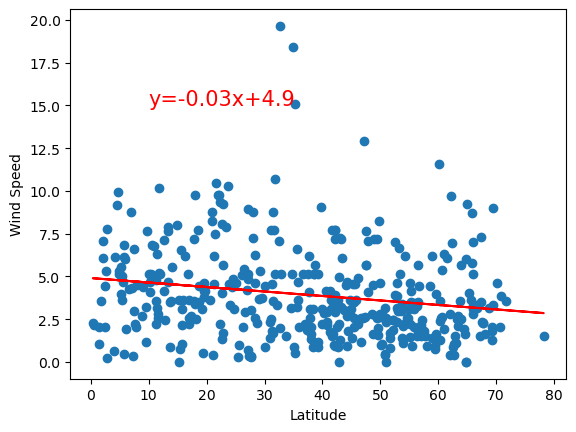

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (10,15))

The r-squared is: 0.007196742078666879


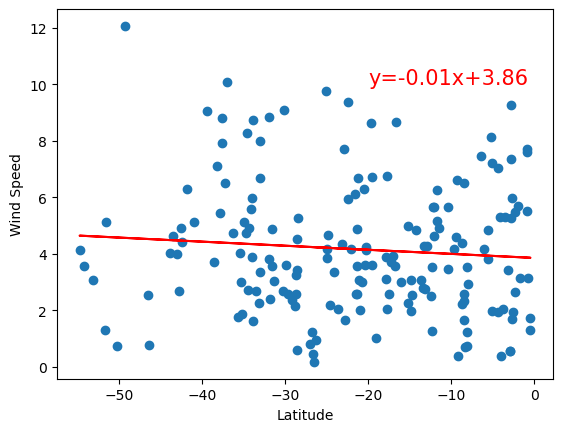

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-20,10))

**Discussion about the linear relationship:** Neither hemispheres show much of a correlation The northern hemisphere shows slight increase in wind speed as move closer to the equator.